### A Model of Churn
For those of you for whom this is your first introduction to Python,we say welcome to the world of Python.  In this notebook, we will give you a fast and hands-on tutorial for measuring churn with Python, the world-changing programming and data science language.  

Python has quickly become the top programming language for data science.  It is also a full-fledged, interpreted language that can be used for many other purposes.  According to GitHub, it is now also the most popular language for machine learning.  

You are now reading a text cell.  If you click on this cell you will see how it is structured. The code side for this text box is on the left and the presentation side is on the right.  You will see that the ## allows Colab (really the Jupyter Notebook technology underlying Colab) to create the formatted title you see at the top of the cell (on the right side).  We'll learn more about this later.

Other cells in this I-Python Notebook (.ipynb) are called code cells and contain code you can run.  This document is made up of code and text cells.  To create a new code or text cell, simply click on +Code or +Text to the left above. 

This is based on https://lwmachinelearning.wordpress.com/portfolio/.  We have rewritten and added to it where we felt it would clarify the concepts for students.

### Necessary imports
In the statements below, we import the various packages and modules that we'll need.  A very nice feature of Google's colab is that it includes most of the packages that a researcher would need in the infrastructure.  The result is that you don't need to install most packages.  Instead, all you generally need to do is import packages.  In the statements below, we import many packages with their common aliases, such as "import pandas as pd", and "import numpy as np".  Notice that we often import methods within such packages as matplotlib.pyplot and various methods of sklearn, such as .model_selection and .ensemble.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

### Bring in a file
Below, we set up a widget to bring in files.  Be sure you have downloaded the churn2.csv file and know how to find it on your computer.  Below, we'll upload the churn2.csv file and bring it into a pandas dataframe.  We use an upload widget to enable us to upload a data file.  Click “Choose Files” and then find and upload the file. Be sure that the file is 100% uploaded before going on. You will see the name of the file appear where "No file chosen" used to be, after you upload the file. You will have to upload the file each time you use this notebook.  

In [2]:
from google.colab import files
uploaded = files.upload()

In the next cell, you'll print out a statement giving the filename and number of bytes in the file. You will use the .keys() method here to display a list of files in the dictionary. For all the files that you have uploaded, you will print out the name and length of each file.  The "for" statement says to continue printing for each filename.

In [0]:
for fn in uploaded.keys():
  print('File "{name}" with length {length} bytes has been uploaded'.format(name=fn, length=len(uploaded[fn])))

File "churn2.csv" with length 977501 bytes has been uploaded


### Read the file into a data frame and print the first 7 rows
Import the input output (io) function.  Then read in the churn2.csv file, using the unicode transformation format or utf-8.  Then print out the first seven rows of the data. Notice also, that any missing values are read in as nulls (spaces).

In [0]:
import io
dataset = pd.read_csv(io.StringIO(uploaded['churn2.csv'].decode('utf-8')),na_values=[" "])
dataset.fillna(' ')
print (dataset.head(7))

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95      1889.50     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes
5  9305-CDSKC  Female              0  ...          99.65       820.50    Yes
6  1452-KIOVK    Male              0  ...          89.10      1949.40     No

[7 rows x 21 columns]


### The .shape function
Try using the .shape function to get the dimensions of the data frame.  Run the code in the cell below, then create a text box explaining what the .shape function does.  Move the text cell up before the code cell by using the up arrow on the hovering toolbar on the upper right of this cell. Notice that you can also move cells down, bring in a link, comment, change the settings, get out of edit mode, and delete a cell through using this toolbar.  And, if you click the "ellipse" or three dots to the right of the other icons, you can cut or copy the cell (and do even more things with a code cell).

In [0]:
dataset.shape

(7043, 21)

### Transpose the dataset
It is easy to transpose the dataset, so the headers are placed on the rows instead of the columns, and the columns represent records going across the page.  Just add ".T" to the end of the dataset.head() statement.

In [0]:
dataset.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Change an integer variable to a categorical one
To change an integer variable to a categorical variable, just add the .Categorical method to pandas (abbreviated by the alias "pd") and list the variable(s) you want to change in single quotes in brackets.  In this case, 'Senior Citizen' becomes a categorical variable.

In [0]:
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen']) #Changing from int to categorical
dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

### Remove a column
To remove a column, just use the 'del' command and list the dataset and, in brackets, the index or the name of the column(s) in single quotes.

In [0]:
del dataset["customerID"] # Deleting the custumerID column

### Finding nulls
You can add each method on a separate line, or you can put more than one method one after the other in Python.  Here, to find nulls, add the .isnull() method to the dataset.  Then, to sum them up, tack on the .sum() method to the end of the statement.  You could also just write two lines of code and do the same thing.

In [0]:
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Dropping missing values
Our results show that only one column, TotalCharges, has nulls.  But there are only 11 cases for which there are any nulls.  So we can easily drop those without hurting our estimations.

In [0]:
dataset = dataset.dropna()

### Changing data types
Next, we will declare that the data types 'float64' and 'int64' are numerics.  This makes sense, and by doing this now, it will be easier to group our variables together for analysis.  After all, different methods are used with numerical and object (categorical) data types.  One group will be called numeric_ds and one objects_ds.

In [0]:
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

### The describe method
To get a picture of what the numeric_ds looks like, we add the describe() method, as shown below.  Then we do the same with the objects_ds.  Notice that we transpose the objects_ds, so that we can see all the variable names and their statistical properties listed out.

In [0]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [0]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


### The groupby() and size() methods
Again, we see the use of two consecutive methods in Python.  Here we want to look at the number in each of the two churn groups (yes, they left or no, they didn't).  Using the groupby() and size() methods in conjunction with each other lets us print out a small, simple table of frequencies, and includes the data type for the "Churn" variable, which is int64.

In [0]:
dataset.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

### Box plots
The distributions of numeric variables can be easily visualized by using box plots.  Since we have grouped these variables in our numeric_ds dataset, we can include the attribute "subplots=True" and automatically get the appropriate box plots printed out.  Be careful to note that "True" needs to be capitalized exactly as it is here in Python.  Also, notice that we have specified a size for the resulting overall figure (with the three subplots).  Last, we go ahead and print out the plot we have designed.

[]

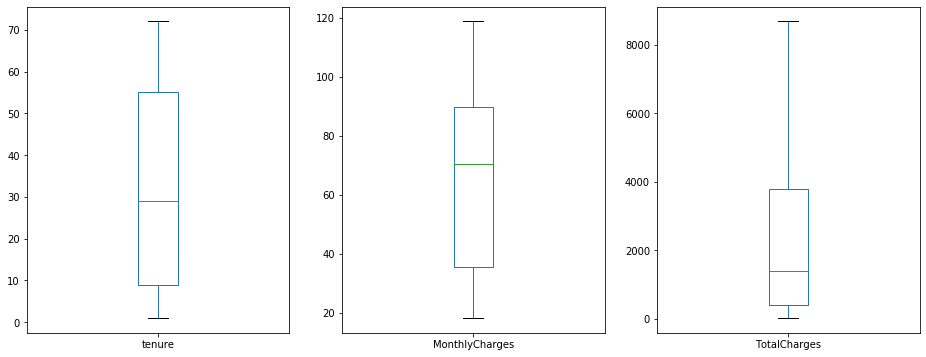

In [0]:
# box plots
numeric_ds.plot(kind='box', subplots=True,figsize=(16,6))
plt.plot()

### Hist() method
Histograms are very useful for obtaining an understanding of data distributions.  Bins of x-axis values are specified, and the y-axis is measured in counts (frequencies) or percentages.  Two attributes are shown for the plots:  the layout, which is specified as one row with three plots, and the figsize.

### Change the color of the bars and the edges of the histogram
It is easy to change the color of the bars in the histogram.  Just include an attribute, color="lime" (or some other color).  To change an edge color, put in ec="saddlebrown" (or another color.)  To find a list of the possible colors you can use, go to https://python-graph-gallery.com/196-select-one-color-with-matplotlib/.

[]

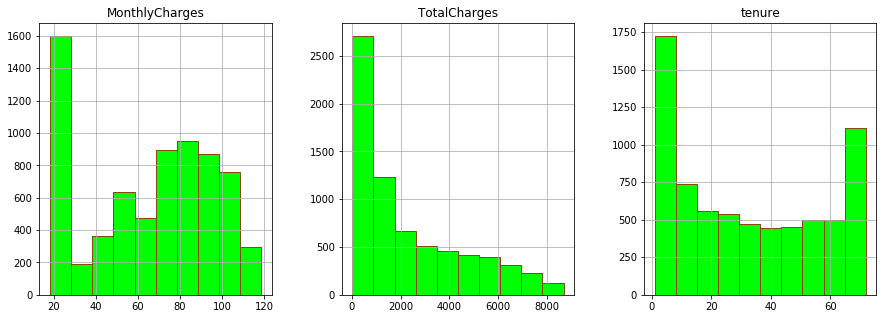

In [0]:
# histogram plots
numeric_ds.hist(color="lime", ec="saddlebrown",layout=(1,3), figsize=(15,5))
plt.plot()

### The .concat() method
Below, we use the .concat() method to concatenate (add on) the "Churn" variable to the numeric_ds we set up above. This allows us to analyze churn for the numeric variables.

In [0]:
numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

### Create a grid of plots, showing breakdown of "Churn" for each
In the lines of code below, we set up a grid of plots, with using the three variables "Tenure", "Monthly Charges", and "Total Charges".  The first plot shows "Tenure" on the x-axis as well as the y-axis, and "Churn" is distinguished by blue (Churn=No) and orange (Churn=Yes).  In this way, we see how the different variables' effects influence "Churn."  The various lines of code specify that the plot is a scatter, the linewidths, the edgecolor, and the size of the markers.  In the third line of code below, sns.kdeplot means to fit and then come up with a plot for either a univariate or bivariate kernel density estimate. The last line of code just adds the legend.  By default, it appears on the right side of the grid of plots.

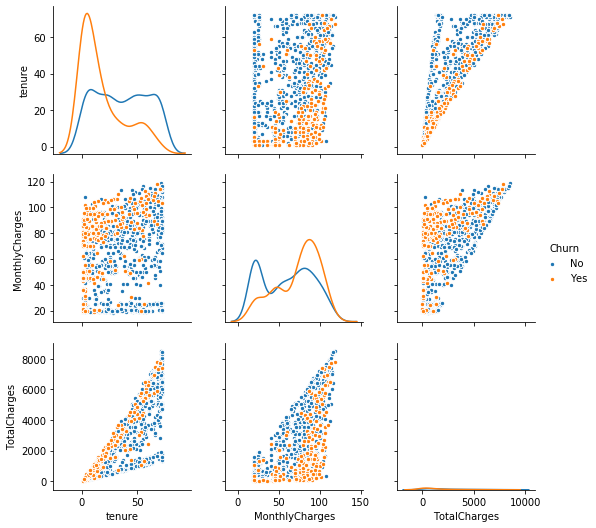

In [0]:
g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

### Create histograms for the variables
In the code below, we set bin cutoff points for the three histograms for the variables "Tenure", "Monthly Charges" and "Total Charges".  Notice how the labels are specified, and for each of the labels, we show the frequencies of datapoints for the Churn and No Churn categories.

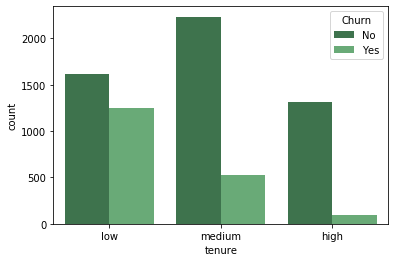

In [0]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

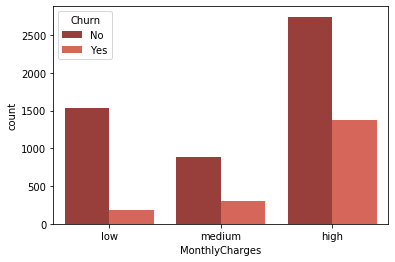

In [0]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Reds_d");

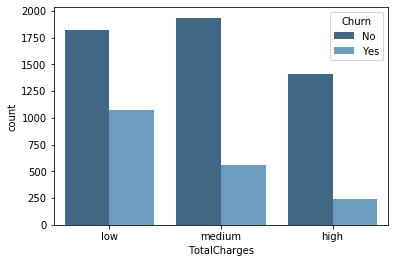

In [0]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000],labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds,palette='Blues_d');

### Examine categorical variables
Now we go on to look at the categorical variables and see how the churn numbers vary.  In the grid we present, we show the subplots, which are bar charts representing frequncies for the two values of our "Churn" variable.  The hspace adjusts the horizontal space between the subplots.  Note the bbox_to_anchor specification for the legend position.  For more on how to use this, go to https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html.  This gets a little complicated! Lastly, since the labels on the ax[3,3] (the last one shown) are a bit long, they need to be rotated slightly to fit.  Here they are rotated 45 degrees.



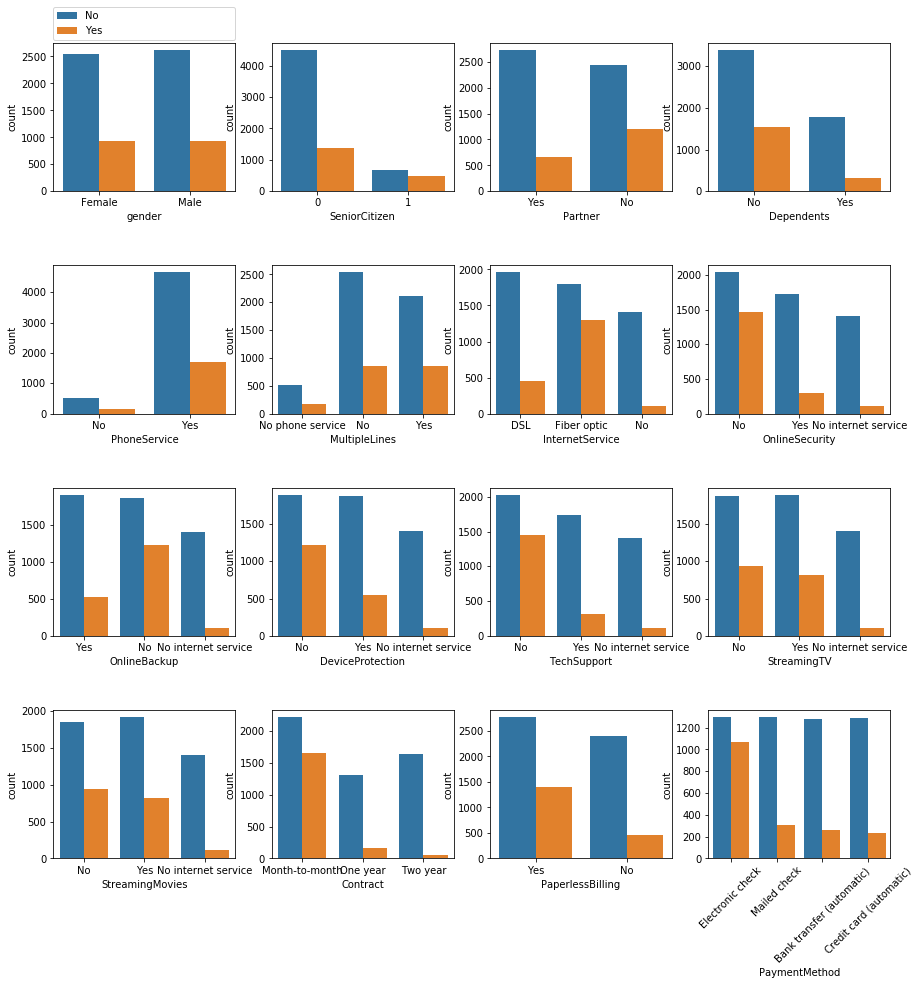

In [0]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

### Machine learning models for churn
Up to this point we have developed some nice charts and graphs for our data and we understand our data better as a result of this.  But now things are going to get really interesting.  

One of the primary results we want to achieve is to be able to predict who will churn.  We need to get our data in shape to do this.  Basically, we're taking our bins for the variables tenure, MonthlyCharges, and TotalCharges and concatenating them with the objects_ds.  Then we'll convert all the variables into categorical variables and then transform the categorical variables into binary vectors.  The dataset is now all zeros and ones (binary).  

In [0]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T
data=pd.concat([bins, objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors
dummy.head()

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,TotalCharges_high,TotalCharges_low,TotalCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


### Split the data
The data is now ready to be split into training and test datasets.  Here we do the commonly-accepted .80/.20 split, meaning that we hold out 20% of the data and train the model on 80% of the data.  

We drop the Churn_Yes and Churn_No dummy variables, since "Churn" is our response variable. And we put everything else into our X values.  Then we create our Y values by using a dummy variable made from "Churn_Yes".  The seed is set to 7, which allows us to go back and duplicate our work, should we have to do that again for some reason.

All this allows us to end up with an X train, X validation, Y Train, Y validation sets, our results from splitting the data.  

In [0]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Creating our models
We'll use a kfold method to create different models and then test them for accuracy.  Here are the models we'll use.

**Logistic Regression:**

**K Nearest Neighbors**

**CART-Classification and Regression Tree**

**Gaussian Naive Bayes**

As the code below shows, we'll first set 'accuracy' as our method for scoring the models.  Accuracy is the fraction of predictions that our model predicts correctly.

We then set our models equal to an empty list.  We proceed to append our models with the 'LR', 'KNN', 'CART', and 'NB' models.  Empty lists are created and set to results and names.  

Then we use a for loop to go through our list of models, for each name and model, using a KFold method of estimating accuracy, also called k-fold Cross-Validation.  Cross-validation consists of a resampling procedure used to evaluate models on a limited data sample. In this case our k is 10, and that refers to the 10 groups that we split our data into.  We then choose one of our groups to take out.  Then we train the rest of the data.  Finally, we use the model we create and use it to estimate the holdout data.  We do this by resampling 10 times and repeating the process.  Last, we average our ten results together to get an idea of the accuracy of our model. When we're done, we go on to the next listed model.  

Most of the code in the for loop is self-explanatory, however the statement "msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())" requires some explanation.

%s says to print the value of the "name" string, followed by ":".  "%f" indicates that it is a literal string, found in parentheses, which, in this case, are to be replaced with the values after they are determined via some function.  Here, the mean and the standard deviation of the various cross validation results are given after the name of each model.

As the results show, the accuracy is highest for the logistic regression function.



In [0]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 0.800179 (0.012824)
KNN: 0.765153 (0.010409)
CART: 0.726401 (0.014365)
NB: 0.701870 (0.015433)


### Plot the results
Although the logistic model looks the best, it's never a bad idea to plot the models.  That is what we do below.

The .suptitle method adds a centered title to the figure.  

The fig.add_subplot adds a position for a subplot where the number given is a three digit integer: the first digit=number of rows, the second=number of columns, the third=index of the subplot. i.e. fig.add_subplot(111) is the same as fig.add_subplot(1, 1, 1). All integers must be 0 to 9 for this format to work.

The ax.set_xticklabels(names) puts the names of the algorithms on the x-axis.

plt.plot() plots the results.

[]

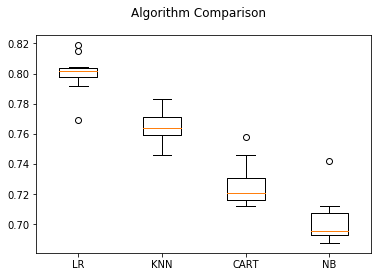

In [0]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')  
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

### Use our LR results to predict
In the code below, we set our model equal to LogisticRegression().  Then we fit the model on X_train and Y_train datasets.  We then use the model to make predictions based on the X_validation model.  Next, we create a confusion matrix based on the Y_validation dataset and the predictions, comparing the true results with the predicted results. And last, we'll create a classification report to see how accurate our predictions were.

In [0]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7945984363894811
[[918  99]
 [190 200]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1017
           1       0.67      0.51      0.58       390

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Discussion of results
Our results show that we do a pretty good job of predicting, but actually it is not so important to predict exactly which clients will leave, but to figure out what influences their chance of leaving.  To explore this further, we'll look at the coefficients of the model.

In the code beow, we'll find the standard deviation of X_train variables and multiply them by the model coefficients.  We'll transpose the data frame of the coefficients and call it df_imp.  Then we'll label the column "importance".  Next we'll take the features and add labels for each of them.  Then we'll sort the variables in descending importance.  And last, we'll display the top five and the lowest five variables in descending importance.

In [0]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
43,0.350954,Contract_Month-to-month
23,0.292869,InternetService_Fiber optic
1,0.237136,tenure_low
7,0.148625,TotalCharges_low
50,0.106498,PaymentMethod_Electronic check


,importance,labels
46,-0.141131,PaperlessBilling_No
3,-0.185951,MonthlyCharges_high
0,-0.235333,tenure_high
22,-0.296474,InternetService_DSL
45,-0.369439,Contract_Two year


These results above show us what is most likely to influence whether someone leaves.  We map the results to a bar chart to make it easier to determine quickly which features are most important.  Our results show us that a two-year contract means that someone is much less likely to leave, while a month-to-month contract increases the likelihood of leaving.  

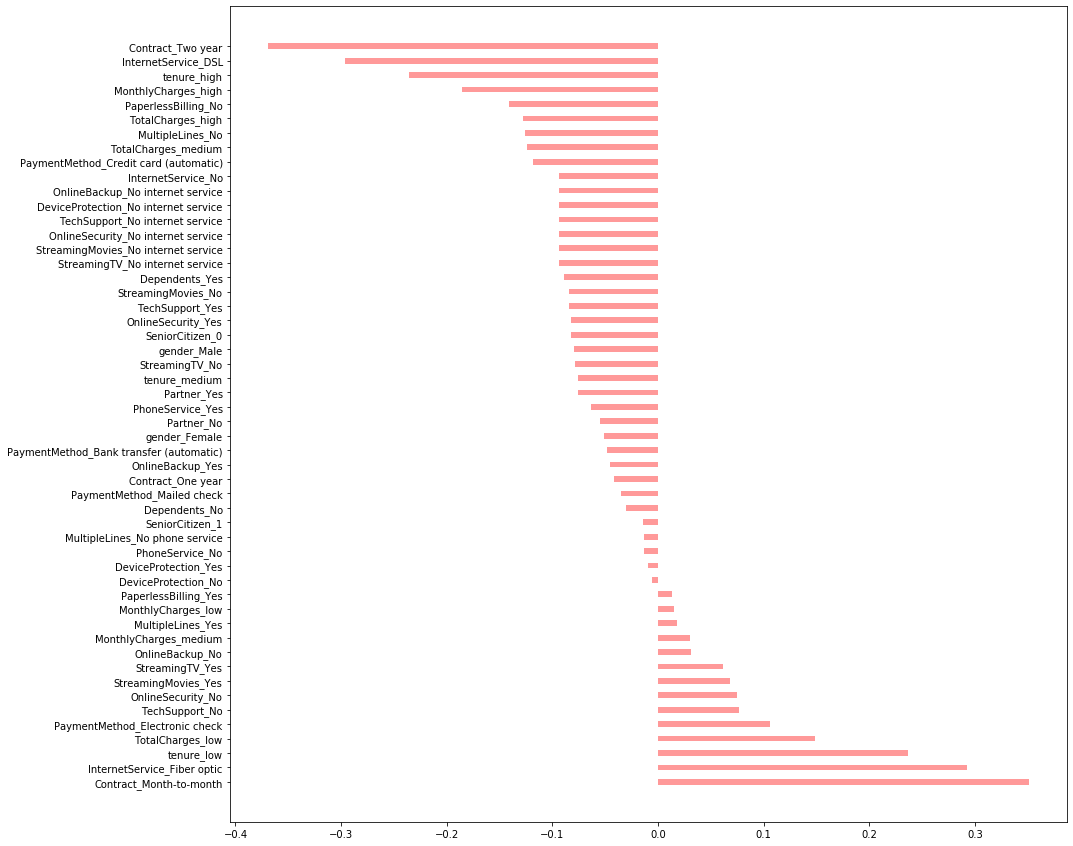

In [0]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.4
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='r', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()